In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("historic.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_no            8000 non-null   int64  
 1   category           8000 non-null   object 
 2   main_promotion     8000 non-null   object 
 3   color              8000 non-null   object 
 4   stars              8000 non-null   float64
 5   success_indicator  8000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 375.1+ KB


# To show data

In [5]:
data

,item_no,category,main_promotion,color,stars,success_indicator
0,739157,Tunic,Catalog,Green,3.1,flop
1,591846,Hoodie,Category_Highlight,Red,1.5,flop
2,337574,Sweatshirt,Catalog,Red,4.4,top
3,401933,Polo-Shirt,Category_Highlight,Blue,3.1,flop
4,812151,Hoodie,Category_Highlight,Green,4.1,top
...,...,...,...,...,...,...
7995,280947,T-Shirt,Catalog,Blue,3.9,flop
7996,874952,Sweatshirt,Frontpage_Header,Green,3.5,top
7997,891640,T-Shirt,Category_Highlight,Yellow,4.0,flop
7998,786448,Blouse,Category_Highlight,Blue,2.6,flop


# Understanding the data distribution

In [6]:
data.describe()

,item_no,stars
count,8000.000000,8000.000000
mean,546474.338375,3.473075
std,256513.463874,0.978810
min,100171.000000,0.300000
25%,325001.500000,2.800000
50%,547081.000000,3.500000
75%,764312.250000,4.200000
max,989740.000000,6.100000


# Identifying null values if any

In [8]:
data.isnull().sum()

item_no              0
category             0
main_promotion       0
color                0
stars                0
success_indicator    0
dtype: int64

# Getting number of unique values from each variable

In [10]:
data.info()
data.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_no            8000 non-null   int64  
 1   category           8000 non-null   object 
 2   main_promotion     8000 non-null   object 
 3   color              8000 non-null   object 
 4   stars              8000 non-null   float64
 5   success_indicator  8000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 375.1+ KB


item_no              8000
category                6
main_promotion          4
color                  10
stars                  57
success_indicator       2
dtype: int64

# Bar graph to understand top v/s flop count 

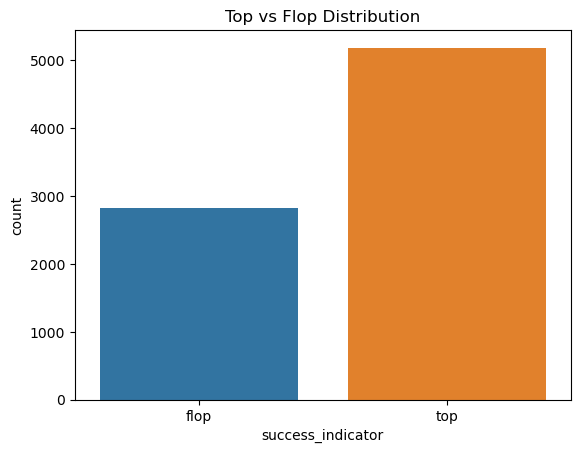

In [21]:
# Distribution of success indicator
sns.countplot(data=data, x='success_indicator')
plt.title('Top vs Flop Distribution')
plt.show()

# Success graph according to each category count

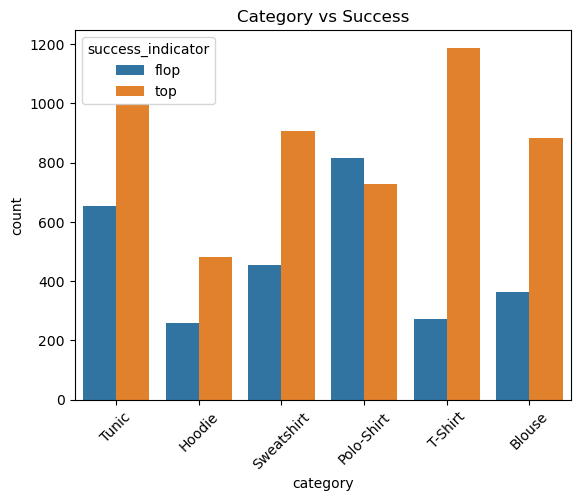

In [15]:
# Category vs Success
sns.countplot(data=data, x='category', hue='success_indicator')
plt.xticks(rotation=45)
plt.title('Category vs Success')
plt.show()

# Success graph according to each promotion type count

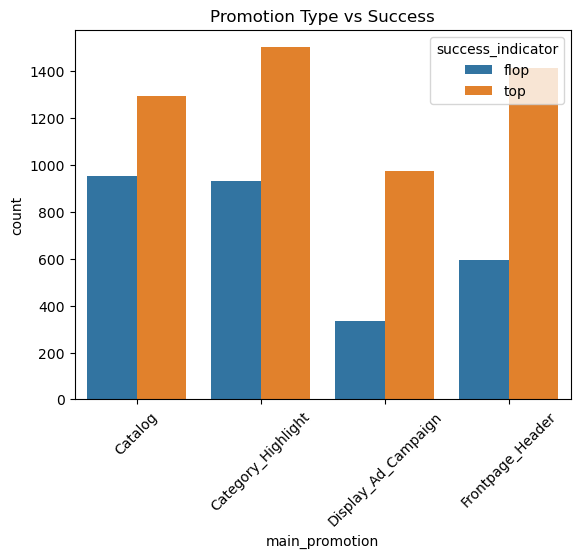

In [16]:
# Promotion vs Success
sns.countplot(data=data, x='main_promotion', hue='success_indicator')
plt.xticks(rotation=45)
plt.title('Promotion Type vs Success')
plt.show()


# Success graph according to each color count

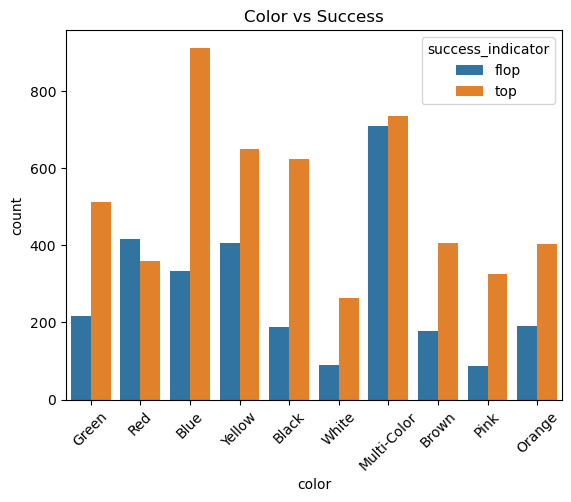

In [17]:
# Color vs Success
sns.countplot(data=data, x='color', hue='success_indicator')
plt.xticks(rotation=45)
plt.title('Color vs Success')
plt.show()

# Understanding overall star rating count distribution 

C:\Users\Kshitij\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


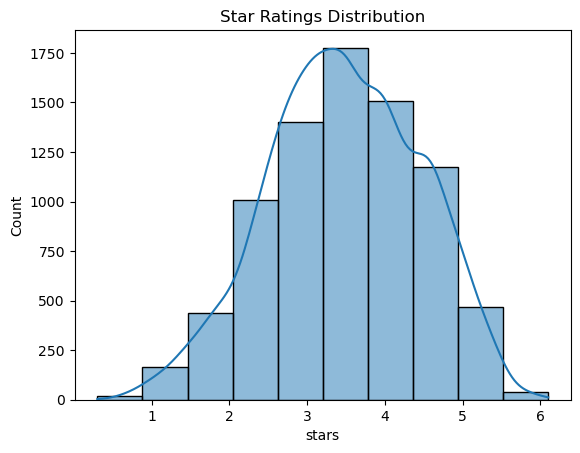

In [19]:
# Stars distribution
sns.histplot(data=data, x='stars', bins=10, kde=True)
plt.title('Star Ratings Distribution')
plt.show()

# Dropping "item_no" column and understanding correlation between attributes of remaining variables

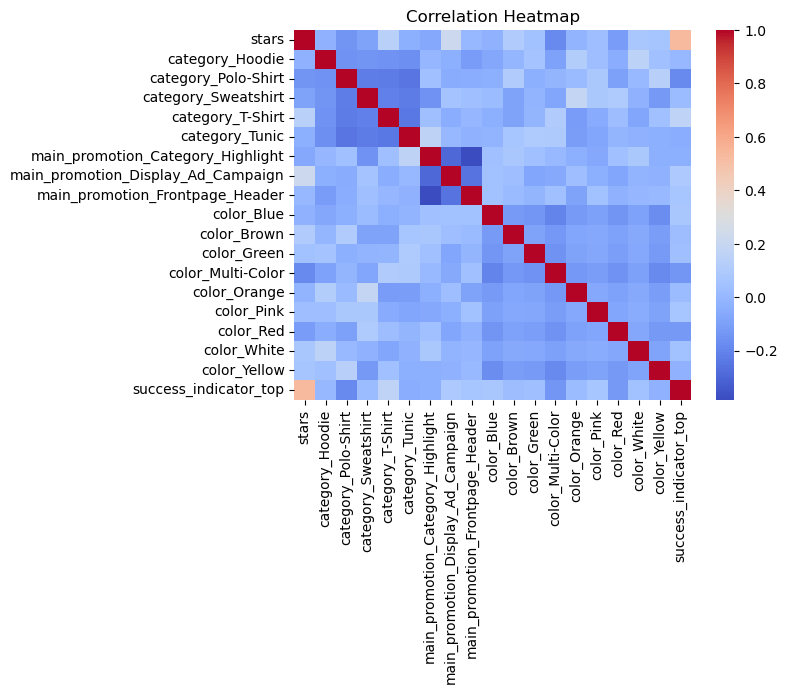

In [20]:
# Optional: Encoding and correlation matrix
data_encoded = pd.get_dummies(data.drop(columns=['item_no']), drop_first=True)
sns.heatmap(data_encoded.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()